# Análise exploratória dos dados (EDA)

## Passo 1: Carregar e Visualizar os Dados

In [1]:
import pandas as pd

df = pd.read_csv('Brasileirao_2003_a_2024.csv')
df

,rodada,ano,mandante,visitante,vencedor,mandante_Placar,visitante_Placar
0,1,2003,Guarani,Vasco,Guarani,4,2
1,1,2003,Athletico-PR,Gremio,Athletico-PR,2,0
2,1,2003,Flamengo,Coritiba,-,1,1
3,1,2003,Goias,Paysandu,-,2,2
4,1,2003,Internacional,Ponte Preta,-,1,1
...,...,...,...,...,...,...,...
8780,38,2024,Palmeiras,Fluminense,Fluminense,0,1
8781,38,2024,Red Bull Bragantino,Criciúma,Red Bull Bragantino,5,1
8782,38,2024,Fortaleza,Internacional,Fortaleza,3,0
8783,38,2024,Cuiabá,Vasco,Vasco,1,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rodada            8785 non-null   int64 
 1   ano               8785 non-null   int64 
 2   mandante          8785 non-null   object
 3   visitante         8785 non-null   object
 4   vencedor          8785 non-null   object
 5   mandante_Placar   8785 non-null   int64 
 6   visitante_Placar  8785 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 480.6+ KB


In [3]:
df.describe()

,rodada,ano,mandante_Placar,visitante_Placar
count,8785.000000,8785.000000,8785.000000,8785.000000
mean,20.105862,2013.041548,1.535458,1.027092
std,11.425072,6.547916,1.224987,1.025270
min,1.000000,2003.000000,0.000000,0.000000
25%,10.000000,2007.000000,1.000000,0.000000
50%,20.000000,2013.000000,1.000000,1.000000
75%,30.000000,2019.000000,2.000000,2.000000
max,46.000000,2024.000000,7.000000,7.000000


## Passo 2: Limpeza e Pré-processamento

In [4]:
df.isnull().sum()

,0
rodada,0
ano,0
mandante,0
visitante,0
vencedor,0
mandante_Placar,0
visitante_Placar,0


In [7]:
df["vencedor"] = df["vencedor"].replace("-", "Empate")
df

,rodada,ano,mandante,visitante,vencedor,mandante_Placar,visitante_Placar
0,1,2003,Guarani,Vasco,Guarani,4,2
1,1,2003,Athletico-PR,Gremio,Athletico-PR,2,0
2,1,2003,Flamengo,Coritiba,Empate,1,1
3,1,2003,Goias,Paysandu,Empate,2,2
4,1,2003,Internacional,Ponte Preta,Empate,1,1
...,...,...,...,...,...,...,...
8780,38,2024,Palmeiras,Fluminense,Fluminense,0,1
8781,38,2024,Red Bull Bragantino,Criciúma,Red Bull Bragantino,5,1
8782,38,2024,Fortaleza,Internacional,Fortaleza,3,0
8783,38,2024,Cuiabá,Vasco,Vasco,1,2


In [9]:
ocorrencia_hifen = df["vencedor"].eq("-").sum()
ocorrencia_hifen

np.int64(0)

## Passo 3: Análise Exploratória

### 3.1 Distribuição de Resultados

In [ ]:
vencedores = df['vencedor'].value_counts()
vencedores

,count
vencedor,
Empate,2323
Flamengo,374
Sao Paulo,365
Internacional,354
Palmeiras,351
Corinthians,341
Santos,340
Fluminense,334
Atletico-MG,327


### 3.2 Desempenho dos Times Mandantes vs. Visitantes

In [ ]:
vitorias_mandantes = df[df['mandante'] == df['vencedor']].shape[0]
vitorias_mandantes

4358

In [ ]:
vitorias_visitantes = df[df['visitante'] == df['vencedor']].shape[0]
vitorias_visitantes

2104

### 3.3 Médias de Gols

In [ ]:
media_gols_mandantes = df['mandante_Placar'].mean()
media_gols_mandantes

1.5354581673306773

In [ ]:
media_gols_visitantes = df['visitante_Placar'].mean()
media_gols_visitantes

1.0270916334661355

### 3.4 Histórico de Confrontos

In [ ]:
confrontos = df.groupby(['mandante', 'visitante', 'vencedor']).size().reset_index(name='contagem')
confrontos

,mandante,visitante,vencedor,contagem
0,America-MG,Athletico-PR,America-MG,5
1,America-MG,Athletico-PR,Empate,1
2,America-MG,Atletico-GO,Atletico-GO,1
3,America-MG,Atletico-GO,Empate,2
4,America-MG,Atletico-MG,Atletico-MG,3
...,...,...,...,...
3315,Vitória,Juventude,Vitória,1
3316,Vitória,Palmeiras,Palmeiras,1
3317,Vitória,Red Bull Bragantino,Vitória,1
3318,Vitória,São Paulo,São Paulo,1


## Passo 4: Feature Engineering

### 4.1. Diferença de Gols

In [ ]:
df['diferenca_gols'] = df['mandante_Placar'] - df['visitante_Placar']
df

,rodada,ano,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,diferenca_gols
0,1,2003,Guarani,Vasco,Guarani,4,2,2
1,1,2003,Athletico-PR,Gremio,Athletico-PR,2,0,2
2,1,2003,Flamengo,Coritiba,Empate,1,1,0
3,1,2003,Goias,Paysandu,Empate,2,2,0
4,1,2003,Internacional,Ponte Preta,Empate,1,1,0
...,...,...,...,...,...,...,...,...
8780,38,2024,Palmeiras,Fluminense,Fluminense,0,1,-1
8781,38,2024,Red Bull Bragantino,Criciúma,Red Bull Bragantino,5,1,4
8782,38,2024,Fortaleza,Internacional,Fortaleza,3,0,3
8783,38,2024,Cuiabá,Vasco,Vasco,1,2,-1


### 4.2 Desempenho Recente

In [ ]:
df['media_gols_mandante_5jogos'] = df.groupby('mandante')['mandante_Placar'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df['media_gols_visitante_5jogos'] = df.groupby('visitante')['visitante_Placar'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

df

,rodada,ano,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,diferenca_gols,media_gols_mandante_5jogos,media_gols_visitante_5jogos
0,1,2003,Guarani,Vasco,Guarani,4,2,2,4.0,2.0
1,1,2003,Athletico-PR,Gremio,Athletico-PR,2,0,2,2.0,0.0
2,1,2003,Flamengo,Coritiba,Empate,1,1,0,1.0,1.0
3,1,2003,Goias,Paysandu,Empate,2,2,0,2.0,2.0
4,1,2003,Internacional,Ponte Preta,Empate,1,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8780,38,2024,Palmeiras,Fluminense,Fluminense,0,1,-1,1.2,1.0
8781,38,2024,Red Bull Bragantino,Criciúma,Red Bull Bragantino,5,1,4,1.4,0.6
8782,38,2024,Fortaleza,Internacional,Fortaleza,3,0,3,1.6,1.6
8783,38,2024,Cuiabá,Vasco,Vasco,1,2,-1,1.0,0.6


### 4.3. Histórico de Confrontos Diretos

In [ ]:
df['vitorias_mandante_confronto'] = df.groupby(['mandante', 'visitante'])['vencedor'].transform(lambda x: (x == x.name[0]).cumsum())
df

,rodada,ano,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,diferenca_gols,media_gols_mandante_5jogos,media_gols_visitante_5jogos,vitorias_mandante_confronto
0,1,2003,Guarani,Vasco,Guarani,4,2,2,4.0,2.0,1
1,1,2003,Athletico-PR,Gremio,Athletico-PR,2,0,2,2.0,0.0,1
2,1,2003,Flamengo,Coritiba,Empate,1,1,0,1.0,1.0,0
3,1,2003,Goias,Paysandu,Empate,2,2,0,2.0,2.0,0
4,1,2003,Internacional,Ponte Preta,Empate,1,1,0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8780,38,2024,Palmeiras,Fluminense,Fluminense,0,1,-1,1.2,1.0,14
8781,38,2024,Red Bull Bragantino,Criciúma,Red Bull Bragantino,5,1,4,1.4,0.6,1
8782,38,2024,Fortaleza,Internacional,Fortaleza,3,0,3,1.6,1.6,5
8783,38,2024,Cuiabá,Vasco,Vasco,1,2,-1,1.0,0.6,0


## Passo 5: Análise Temporal

### 5.1. Desempenho dos Times por Ano

In [ ]:
desempenho_mandante = df.groupby(['ano', 'mandante']).apply(lambda x: pd.Series({
    'vitorias': (x['vencedor'] == x['mandante']).sum(),
    'empates': (x['vencedor'] == 'Empate').sum(),
    'derrotas': (x['vencedor'] == x['visitante']).sum()
})).reset_index()

desempenho_visitante = df.groupby(['ano', 'visitante']).apply(lambda x: pd.Series({
    'vitorias': (x['vencedor'] == x['visitante']).sum(),
    'empates': (x['vencedor'] == 'Empate').sum(),
    'derrotas': (x['vencedor'] == x['mandante']).sum()
})).reset_index()

desempenho_total = pd.concat([desempenho_mandante, desempenho_visitante])
desempenho_total = desempenho_total.groupby(['ano', 'mandante']).sum().reset_index()

sao_paulo_desempenho = desempenho_total[desempenho_total['mandante'] == 'Sao Paulo']
print(sao_paulo_desempenho)

<ipython-input-19-598c8c8ed02b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  desempenho_mandante = df.groupby(['ano', 'mandante']).apply(lambda x: pd.Series({


      ano   mandante  vitorias  empates  derrotas visitante
21   2003  Sao Paulo        13        5         5         0
45   2004  Sao Paulo        17        5         1         0
68   2005  Sao Paulo        10        6         5         0
88   2006  Sao Paulo        14        4         1         0
107  2007  Sao Paulo        13        3         3         0
126  2008  Sao Paulo        14        4         1         0
147  2009  Sao Paulo        12        6         1         0
167  2010  Sao Paulo        10        3         6         0
188  2011  Sao Paulo         9        6         4         0
207  2012  Sao Paulo        15        2         2         0
227  2013  Sao Paulo         8        3         8         0
247  2014  Sao Paulo        11        6         2         0
267  2015  Sao Paulo        12        6         1         0
287  2016  Sao Paulo         9        5         5         0
306  2017  Sao Paulo         9        8         2         0
326  2018  Sao Paulo        10        8 

<ipython-input-19-598c8c8ed02b>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  desempenho_visitante = df.groupby(['ano', 'visitante']).apply(lambda x: pd.Series({


### 5.2. Evolução da Média de Gols por Ano

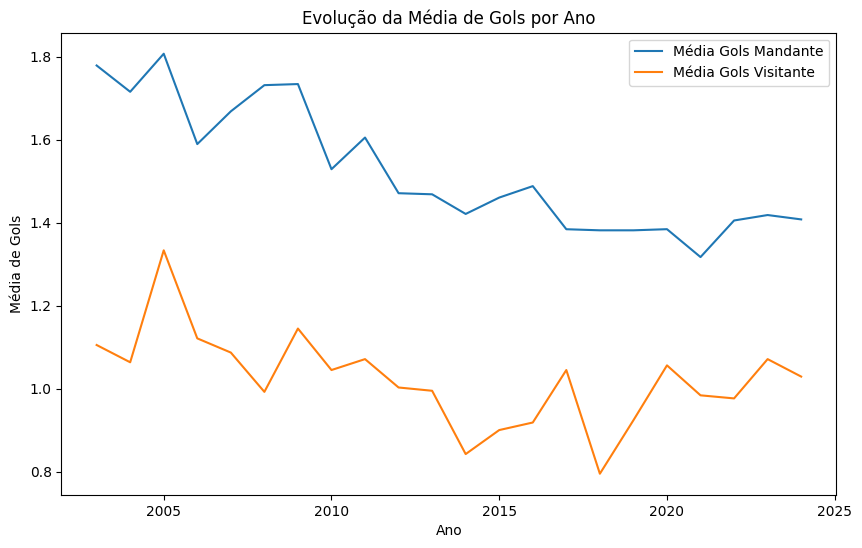

In [ ]:
media_gols_ano = df.groupby('ano').agg({
    'mandante_Placar': 'mean',
    'visitante_Placar': 'mean'
}).reset_index()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(media_gols_ano['ano'], media_gols_ano['mandante_Placar'], label='Média Gols Mandante')
plt.plot(media_gols_ano['ano'], media_gols_ano['visitante_Placar'], label='Média Gols Visitante')
plt.xlabel('Ano')
plt.ylabel('Média de Gols')
plt.title('Evolução da Média de Gols por Ano')
plt.legend()
plt.show()

## Passo 6: Análise de Times Específicos

### 6.1. Desempenho do Flamengo

In [ ]:
flamengo_mandante = df[df['mandante'] == 'Flamengo']
flamengo_visitante = df[df['visitante'] == 'Flamengo']

flamengo_mandante_desempenho = flamengo_mandante['vencedor'].value_counts()
flamengo_visitante_desempenho = flamengo_visitante['vencedor'].value_counts()

print("Desempenho do Flamengo como mandante:")
print(flamengo_mandante_desempenho)

print("\nDesempenho do Flamengo como visitante:")
print(flamengo_visitante_desempenho)

Desempenho do Flamengo como mandante:
vencedor
Flamengo         235
Empate           109
Fluminense         9
Palmeiras          6
Athletico-PR       6
Atletico-MG        5
Sao Paulo          5
Santos             5
Internacional      4
Figueirense        4
Corinthians        4
Gremio             4
Parana             3
Fortaleza          3
Vasco              3
Cruzeiro           3
Ponte Preta        2
Ceara              2
Botafogo-RJ        2
Vitoria            2
Juventude          2
Bahia              1
Atletico-GO        1
Nautico            1
Goias              1
Coritiba           1
Brasiliense        1
Bragantino         1
Avai               1
Botafogo           1
Name: count, dtype: int64

Desempenho do Flamengo como visitante:
vencedor
Flamengo         139
Empate           122
Athletico-PR      13
Internacional     13
Gremio            12
Atletico-MG       12
Cruzeiro          11
Sao Paulo         10
Corinthians       10
Coritiba           9
Santos             7
Palmeiras        

### 6.2. Comparação entre Times

In [ ]:
flamengo_vs_corinthians = df[((df['mandante'] == 'Flamengo') & (df['visitante'] == 'Corinthians')) |
                           ((df['mandante'] == 'Corinthians') & (df['visitante'] == 'Flamengo'))]


resultados = flamengo_vs_corinthians['vencedor'].value_counts()
print(resultados)

vencedor
Flamengo       18
Corinthians    14
Empate         10
Name: count, dtype: int64


## Passo 7: Análise de Empates

### 7.1. Taxa de Empates por Ano

<ipython-input-23-f13942512daa>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  taxa_empates = df.groupby('ano').apply(lambda x: (x['vencedor'] == 'Empate').mean()).reset_index()


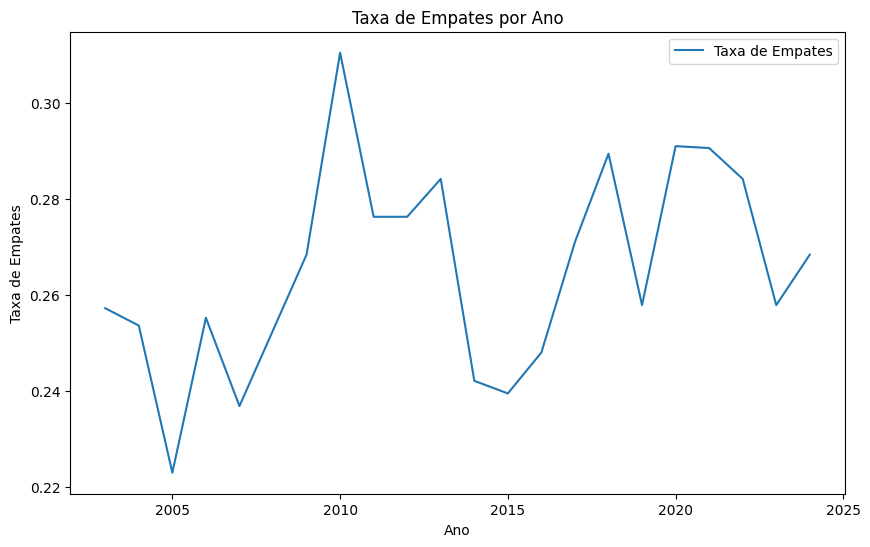

In [ ]:
taxa_empates = df.groupby('ano').apply(lambda x: (x['vencedor'] == 'Empate').mean()).reset_index()
taxa_empates.columns = ['ano', 'taxa_empates']


plt.figure(figsize=(10, 6))
plt.plot(taxa_empates['ano'], taxa_empates['taxa_empates'], label='Taxa de Empates')
plt.xlabel('Ano')
plt.ylabel('Taxa de Empates')
plt.title('Taxa de Empates por Ano')
plt.legend()
plt.show()

### 7.2. Times com Mais Empates

In [ ]:
empates_mandante = df[(df['vencedor'] == 'Empate')].groupby('mandante').size().reset_index(name='empates_mandante')
empates_visitante = df[(df['vencedor'] == 'Empate')].groupby('visitante').size().reset_index(name='empates_visitante')

empates_total = pd.merge(empates_mandante, empates_visitante, left_on='mandante', right_on='visitante', how='outer')
empates_total['total_empates'] = empates_total['empates_mandante'].fillna(0) + empates_total['empates_visitante'].fillna(0)

empates_total = empates_total.sort_values(by='total_empates', ascending=False)
empates_total.head(10)

,mandante,empates_mandante,visitante,empates_visitante,total_empates
17,Corinthians,117,Corinthians,123,240
25,Flamengo,109,Flamengo,122,231
49,Sao Paulo,111,Sao Paulo,118,229
26,Fluminense,119,Fluminense,104,223
47,Santos,106,Santos,111,217
34,Internacional,97,Internacional,112,209
4,Atletico-MG,83,Atletico-MG,116,199
2,Athletico-PR,106,Athletico-PR,92,198
39,Palmeiras,81,Palmeiras,116,197
52,Vasco,96,Vasco,99,195


## Passo 8: Análise de Gols Extremos

### 8.1. Jogos com Mais Gols

In [ ]:
df['total_gols'] = df['mandante_Placar'] + df['visitante_Placar']

jogos_mais_gols = df.nlargest(10, 'total_gols')
jogos_mais_gols[['ano', 'mandante', 'visitante', 'mandante_Placar', 'visitante_Placar', 'total_gols']]

,ano,mandante,visitante,mandante_Placar,visitante_Placar,total_gols
450,2003,Bahia,Santos,4,7,11
23,2003,Vasco,Goias,6,4,10
1876,2006,Athletico-PR,Vasco,6,4,10
2333,2008,Portuguesa,Figueirense,5,5,10
8275,2023,Goias,Bahia,4,6,10
616,2004,Criciuma,Goias,7,2,9
1258,2005,Athletico-PR,Vasco,7,2,9
1286,2005,Athletico-PR,Cruzeiro,5,4,9
1946,2007,Figueirense,Athletico-PR,3,6,9
3579,2011,Santos,Flamengo,4,5,9


### 8.2. Times que Mais Marcam e Sofrem Gols

In [ ]:
times_mais_gols_mandante = df.groupby('mandante')['mandante_Placar'].sum().reset_index()
times_mais_gols_mandante = times_mais_gols_mandante.sort_values(by='mandante_Placar', ascending=False)
print("Times que mais marcam gols como mandante:")
print(times_mais_gols_mandante.head(10))

times_mais_gols_visitante = df.groupby('visitante')['visitante_Placar'].sum().reset_index()
times_mais_gols_visitante = times_mais_gols_visitante.sort_values(by='visitante_Placar', ascending=False)
print("\nTimes que mais sofrem gols como visitante:")
print(times_mais_gols_visitante.head(10))

Times que mais marcam gols como mandante:
         mandante  mandante_Placar
47         Santos              728
25       Flamengo              708
49      Sao Paulo              685
4     Atletico-MG              677
39      Palmeiras              675
2    Athletico-PR              667
34  Internacional              659
26     Fluminense              647
29         Gremio              640
21       Cruzeiro              633

Times que mais sofrem gols como visitante:
        visitante  visitante_Placar
25       Flamengo               522
26     Fluminense               484
49      Sao Paulo               478
39      Palmeiras               462
4     Atletico-MG               454
47         Santos               450
17    Corinthians               430
34  Internacional               424
21       Cruzeiro               423
2    Athletico-PR               404


## Passo 9: Análise de Correlações

### 9.1. Correlação entre Gols Marcados e Sofridos

In [ ]:
gols_marcados = df.groupby('mandante')['mandante_Placar'].sum().reset_index()
gols_sofridos = df.groupby('mandante')['visitante_Placar'].sum().reset_index()


gols_time = pd.merge(gols_marcados, gols_sofridos, on='mandante')
gols_time.columns = ['time', 'gols_marcados', 'gols_sofridos']

correlacao = gols_time[['gols_marcados', 'gols_sofridos']].corr()
correlacao

,gols_marcados,gols_sofridos
gols_marcados,1.000000,0.977211
gols_sofridos,0.977211,1.000000


### 9.2. Correlação entre Vitórias e Gols Marcados

In [ ]:
vitorias_time = df[df['vencedor'] != 'Empate'].groupby('vencedor').size().reset_index(name='vitorias')

vitorias_gols = pd.merge(vitorias_time, gols_marcados, left_on='vencedor', right_on='mandante')
vitorias_gols = vitorias_gols[['vencedor', 'vitorias', 'mandante_Placar']]
vitorias_gols.columns = ['time', 'vitorias', 'gols_marcados']


correlacao_vitorias_gols = vitorias_gols[['vitorias', 'gols_marcados']].corr()
correlacao_vitorias_gols

,vitorias,gols_marcados
vitorias,1.000000,0.995243
gols_marcados,0.995243,1.000000


## Passo 10: Análise de Agrupamentos

### 10.1. Agrupar Times por Gols Marcados e Sofridos

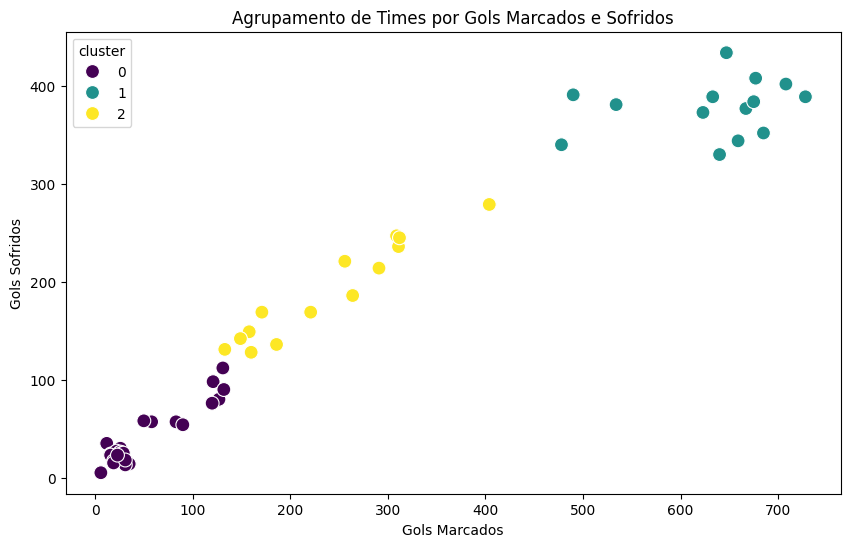

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

X = gols_time[['gols_marcados', 'gols_sofridos']]

kmeans = KMeans(n_clusters=3, random_state=42)
gols_time['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=gols_time, x='gols_marcados', y='gols_sofridos', hue='cluster', palette='viridis', s=100)
plt.title('Agrupamento de Times por Gols Marcados e Sofridos')
plt.xlabel('Gols Marcados')
plt.ylabel('Gols Sofridos')
plt.show()

### 10.2. Identificar Grupos de Times

In [ ]:
cluster_0 = gols_time[gols_time['cluster'] == 0]
print("Times no Cluster 0:")
print(cluster_0['time'].tolist())

cluster_1 = gols_time[gols_time['cluster'] == 1]
print("\nTimes no Cluster 1:")
print(cluster_1['time'].tolist())

cluster_2 = gols_time[gols_time['cluster'] == 2]
print("\nTimes no Cluster 2:")
print(cluster_2['time'].tolist())

Times no Cluster 0:
['America-RN', 'Atlético-GO', 'Atlético-MG', 'Barueri', 'Botafogo', 'Bragantino', 'Brasiliense', 'CSA', 'Criciuma', 'Criciúma', 'Cuiaba', 'Cuiabá', 'Gremio Prudente', 'Grêmio', 'Guarani', 'Inter', 'Ipatinga', 'Joinville', 'Nautico', 'Paysandu', 'Portuguesa', 'Red Bull Bragantino', 'Santa Cruz', 'Santo Andre', 'Sao Caetano', 'São Paulo', 'Vitória']

Times no Cluster 1:
['Athletico-PR', 'Atletico-MG', 'Botafogo-RJ', 'Corinthians', 'Cruzeiro', 'Flamengo', 'Fluminense', 'Goias', 'Gremio', 'Internacional', 'Palmeiras', 'Santos', 'Sao Paulo', 'Vasco']

Times no Cluster 2:
['America-MG', 'Atletico-GO', 'Avai', 'Bahia', 'Ceara', 'Chapecoense', 'Coritiba', 'Figueirense', 'Fortaleza', 'Juventude', 'Parana', 'Ponte Preta', 'Sport', 'Vitoria']


## Passo 11: Visualizações Adicionais

### 11.1. Distribuição de Gols por Time

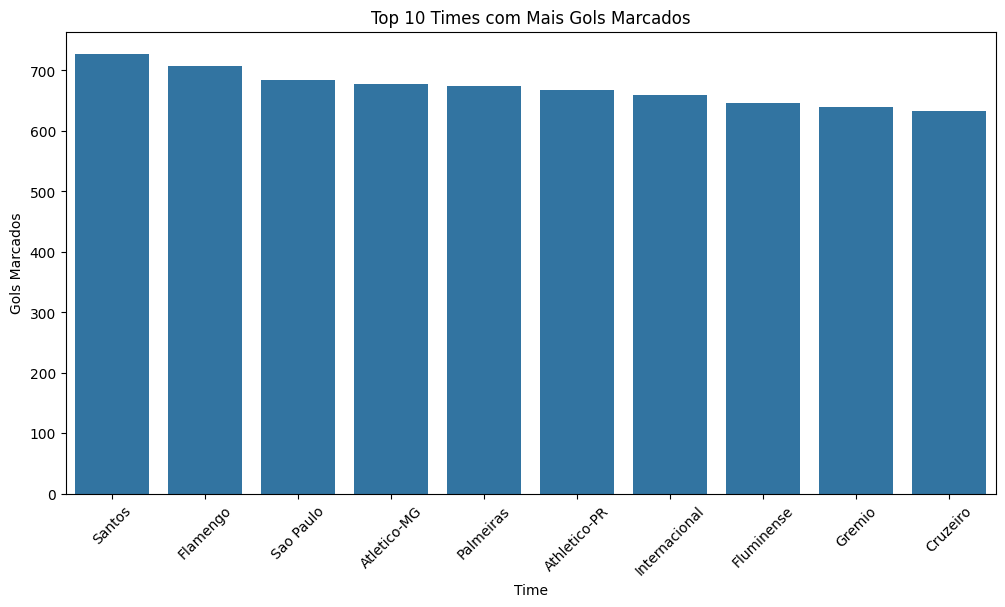

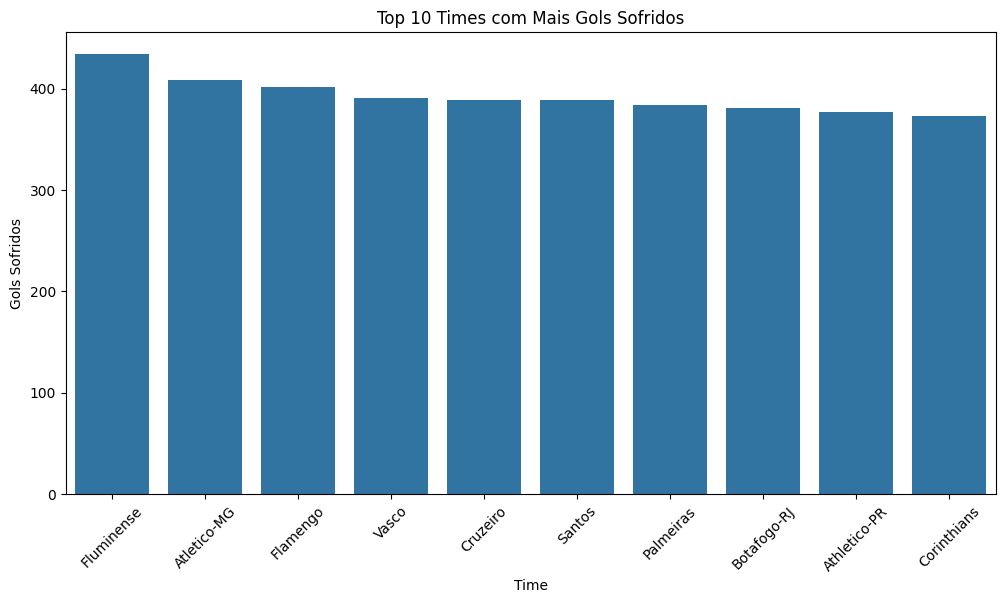

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=gols_time.sort_values(by='gols_marcados', ascending=False).head(10), x='time', y='gols_marcados')
plt.title('Top 10 Times com Mais Gols Marcados')
plt.xlabel('Time')
plt.ylabel('Gols Marcados')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=gols_time.sort_values(by='gols_sofridos', ascending=False).head(10), x='time', y='gols_sofridos')
plt.title('Top 10 Times com Mais Gols Sofridos')
plt.xlabel('Time')
plt.ylabel('Gols Sofridos')
plt.xticks(rotation=45)
plt.show()

## Passo 12: Análise de Temporadas Específicas

### 12.1. Desempenho na Última Temporada (2024)

In [ ]:
df_2024 = df[df['ano'] == 2024]


desempenho_2024 = df_2024.groupby('mandante').apply(lambda x: pd.Series({
    'vitorias': (x['vencedor'] == x['mandante']).sum(),
    'empates': (x['vencedor'] == 'Empate').sum(),
    'derrotas': (x['vencedor'] == x['visitante']).sum()
})).reset_index()


desempenho_2024 = desempenho_2024.sort_values(by='vitorias', ascending=False)
desempenho_2024.head(10)

<ipython-input-33-c0bcbd829fdc>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  desempenho_2024 = df_2024.groupby('mandante').apply(lambda x: pd.Series({


,mandante,vitorias,empates,derrotas
12,Fortaleza,14,5,0
4,Botafogo,12,5,2
19,São Paulo,12,3,4
17,Palmeiras,12,2,5
3,Bahia,11,3,5
10,Flamengo,11,5,3
20,Vasco,10,5,4
6,Corinthians,10,8,1
8,Cruzeiro,10,5,4
13,Grêmio,9,2,8


### 12.2. Comparação entre Temporadas

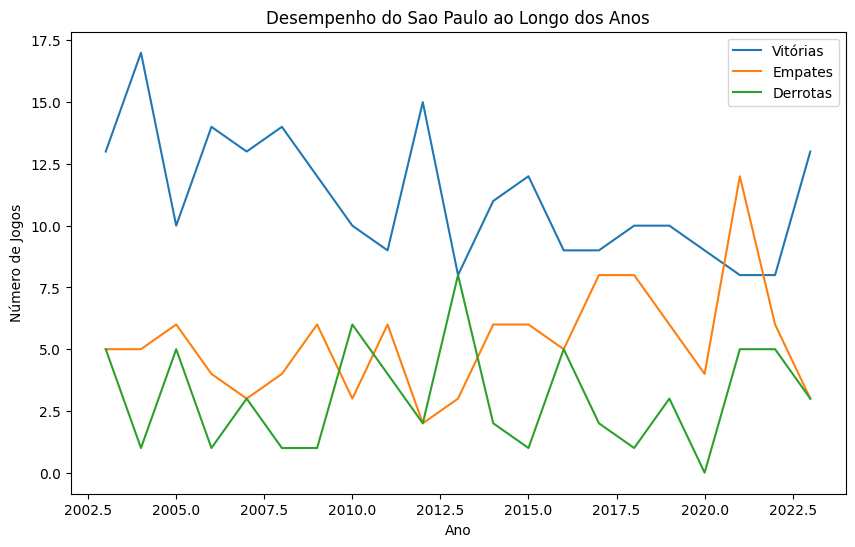

In [ ]:
sao_paulo_temporadas = desempenho_total[desempenho_total['mandante'] == 'Sao Paulo']


plt.figure(figsize=(10, 6))
plt.plot(sao_paulo_temporadas['ano'], sao_paulo_temporadas['vitorias'], label='Vitórias')
plt.plot(sao_paulo_temporadas['ano'], sao_paulo_temporadas['empates'], label='Empates')
plt.plot(sao_paulo_temporadas['ano'], sao_paulo_temporadas['derrotas'], label='Derrotas')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos')
plt.title('Desempenho do Sao Paulo ao Longo dos Anos')
plt.legend()
plt.show()

# Baixando CSV

In [ ]:
from google.colab import files

df.to_csv('Brasileirao_Previsao.csv', index=False)

files.download('Brasileirao_Previsao.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_br = pd.read_csv('/content/Brasileirao_Previsao.csv')
df_br